In [ ]:
!pip install pyxlsb # Download the pyxlsb

In [ ]:
import pandas as pd
import pyxlsb
import numpy as np

In [ ]:
data = pd.read_excel('/content/stc TV Data Set_T1.xlsb') # Read the dataset

In [ ]:
data.shape # Print the shape

(1048575, 13)

In [ ]:
data.head()

,Column1,date_,user_id_maped,program_name,duration_seconds,program_class,season,episode,program_desc,program_genre,series_title,hd,original_name
0,1,42882,26138,100 treets,40,MOVIE,0,0,Drama Movie100 Streets,Drama,0,0,100 treets
1,3,42876,7946,Moana,17,MOVIE,0,0,Animation MovieMoana (HD),Animation,0,1,Moana
2,4,42957,7418,The Mermaid Princess,8,MOVIE,0,0,Animation MovieThe Mermaid Princess (HD),Animation,0,1,The Mermaid Princess
3,5,42942,19307,The Mermaid Princess,76,MOVIE,0,0,Animation MovieThe Mermaid Princess (HD),Animation,0,1,The Mermaid Princess
4,7,42923,15860,Churchill,87,MOVIE,0,0,Biography MovieChurchill (HD),Biography,0,1,Churchill


In [ ]:
data.columns # Print the columns

Index(['Column1', 'date_', 'user_id_maped', 'program_name', 'duration_seconds',
       'program_class', 'season', 'episode', 'program_desc', 'program_genre',
       'series_title', 'hd', 'original_name'],
      dtype='object')

In [ ]:
data = data.drop(columns=['Column1']) # Drop first column

In [ ]:
data.columns

Index(['date_', 'user_id_maped', 'program_name', 'duration_seconds',
       'program_class', 'season', 'episode', 'program_desc', 'program_genre',
       'series_title', 'hd', 'original_name'],
      dtype='object')

In [ ]:
data['program_name'] = data['program_name'].str.strip()
data['program_name']

0                                              100 treets
1                                                   Moana
2                                    The Mermaid Princess
3                                    The Mermaid Princess
4                                               Churchill
                                ...                      
1048570                                  Extraterrestrial
1048571    Friends     The One With The Holiday Armadillo
1048572      Masters of Horror  Dreams In The Witch House
1048573                             Two Lovers and a Bear
1048574                                   American Psycho
Name: program_name, Length: 1048575, dtype: object

In [ ]:
data['date_'] = pd.to_datetime(data['date_']) #Read as a datetime
data[['duration_seconds', 'season','episode','series_title','hd']] = data[['duration_seconds', 'season','episode','series_title','hd']].apply(pd.to_numeric)  # read columns as numeric data types
data[['user_id_maped', 'program_name','program_class','program_desc','program_genre','original_name']] = data[['user_id_maped', 'program_name','program_class','program_desc','program_genre','original_name']].astype(str) # read columns as string data types

In [ ]:
data.head()

,date_,user_id_maped,program_name,duration_seconds,program_class,season,episode,program_desc,program_genre,series_title,hd,original_name
0,1899-12-30 00:00:00.000042882,26138,100 treets,40,MOVIE,0,0,Drama Movie100 Streets,Drama,0,0,100 treets
1,1899-12-30 00:00:00.000042876,7946,Moana,17,MOVIE,0,0,Animation MovieMoana (HD),Animation,0,1,Moana
2,1899-12-30 00:00:00.000042957,7418,The Mermaid Princess,8,MOVIE,0,0,Animation MovieThe Mermaid Princess (HD),Animation,0,1,The Mermaid Princess
3,1899-12-30 00:00:00.000042942,19307,The Mermaid Princess,76,MOVIE,0,0,Animation MovieThe Mermaid Princess (HD),Animation,0,1,The Mermaid Princess
4,1899-12-30 00:00:00.000042923,15860,Churchill,87,MOVIE,0,0,Biography MovieChurchill (HD),Biography,0,1,Churchill


In [ ]:
data.isnull().any() #Check if the columns have null values

date_               False
user_id_maped       False
program_name        False
duration_seconds    False
program_class       False
season              False
episode             False
program_desc        False
program_genre       False
series_title        False
hd                  False
original_name       False
dtype: bool

In [ ]:
data.dtypes

date_               datetime64[ns]
user_id_maped               object
program_name                object
duration_seconds             int64
program_class               object
season                       int64
episode                      int64
program_desc                object
program_genre               object
series_title                 int64
hd                           int64
original_name               object
dtype: object

In [ ]:
df=data.copy()

In [ ]:
grouped=df.copy() # Create a copy of the DataFrame
grouped.loc[grouped['program_class'] == 'SERIES/EPISODES', 'program_name'] = grouped['program_name']+'_SE'+grouped['season'].astype(str)+'_EP'+grouped['episode'].astype(str) # Modify the 'program_name' column for entries with 'program_class' equal to 'SERIES/EPISODES'
# Group the DataFrame by 'program_name' and 'program_class' and aggregate statistics
grouped = grouped.groupby(['program_name','program_class'])\
.agg({'user_id_maped': [('co1', 'nunique'),('co2', 'count')],\
      'duration_seconds': [('co3', 'sum')] }).reset_index()
# Rename the aggregated columns
grouped.columns = ['program_name','program_class','No of Users who Watched', 'No of watches', 'Total watch time in seconds']
# Convert the total watch time from seconds to hours
grouped['Total watch time in houres']=grouped['Total watch time in seconds']/3600
# Drop the 'Total watch time in seconds' column
grouped = grouped.drop(columns=['Total watch time in seconds'])
# Sort the DataFrame by 'Total watch time in houres', 'No of watches', and 'No of Users who Watched' in descending order
grouped = grouped.sort_values(by=['Total watch time in houres', 'No of watches','No of Users who Watched'], ascending=False).reset_index(drop=True)

In [ ]:
grouped.head(35) # Print the top 35 movies

,program_name,program_class,No of Users who Watched,No of watches,Total watch time in houres
0,The Boss Baby,MOVIE,3389,24047,2961.350833
1,The Amazing pider-Man,MOVIE,1011,2877,1966.119167
2,The Expendables,MOVIE,853,2119,1961.159444
3,Moana,MOVIE,2173,8081,1706.176944
4,Trolls,MOVIE,2613,13793,1601.023056
5,Bean,MOVIE,949,3617,1423.955000
6,The murfs,MOVIE,867,3132,1342.141111
7,Hotel Transylvania,MOVIE,491,1947,1096.533611
8,Cloudy With a Chance of Meatballs,MOVIE,683,2076,948.674722
9,The Man With The Iron Fists,MOVIE,707,2505,859.626389


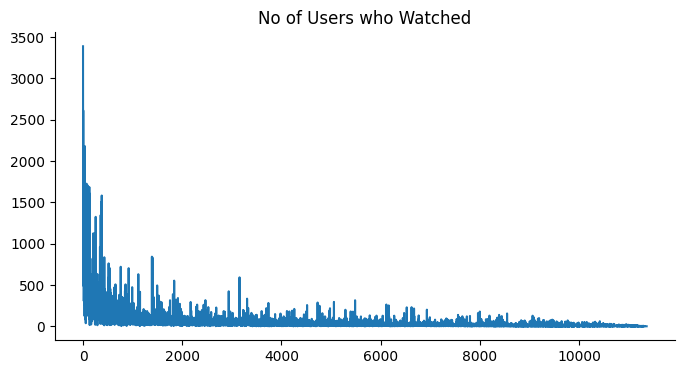

In [ ]:
# @title No of Users who Watched

from matplotlib import pyplot as plt
grouped['No of Users who Watched'].plot(kind='line', figsize=(8, 4), title='No of Users who Watched')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
import matplotlib.pyplot as plt
import plotly
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [ ]:
fig = px.pie(grouped.head(10), values='Total watch time in houres', names='program_name',\
             hover_data=['program_class'],title='top 10 programs in total watch time in houres')
fig.show()

In [ ]:
grouped=df.copy()
grouped = grouped.groupby('program_class')\
.agg({'user_id_maped': [('co1', 'nunique'),('co2', 'count')],\
      'duration_seconds': [('co3', 'sum')] }).reset_index()
grouped.columns = ['program_class','No of Users who Watched', 'No of watches', 'Total watch time in seconds']
grouped['Total watch time in houres']=grouped['Total watch time in seconds']/3600
grouped = grouped.drop(columns=['Total watch time in seconds'])
grouped = grouped.sort_values(by=['Total watch time in houres', 'No of watches','No of Users who Watched'], ascending=False).reset_index(drop=True)

In [ ]:
grouped.head()

,program_class,No of Users who Watched,No of watches,Total watch time in houres
0,SERIES/EPISODES,3901,560174,255097.787500
1,MOVIE,11355,488401,103444.145556


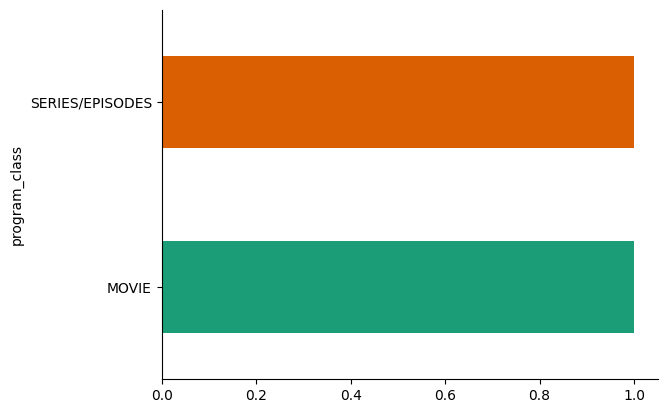

In [ ]:
# @title program_class

from matplotlib import pyplot as plt
import seaborn as sns
grouped.groupby('program_class').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
fig = px.pie(grouped, values='No of Users who Watched', names='program_class',\
             hover_data=['program_class'],title='Total Users watching by program_class')

fig.update_traces(sort=False)
fig.show()